In [1]:
##import pandas
import pandas as pd

In [2]:
##read selected file
df = pd.read_csv('Data/Traffic_Collision_Data_from_2019_to_Present.csv')

In [3]:
##conduct data exploration 
df.shape

(90784, 18)

In [4]:
df.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,200704291,01/07/2020,01/01/2019,1033,7,Wilshire,793,997,TRAFFIC COLLISION,3004 3028 3030 3037 3101 3401 3701 4027 3035,23.0,M,W,101.0,STREET,CRENSHAW,WASHINGTON,"(34.0399, -118.3311)"
1,191304041,01/01/2019,01/01/2019,200,13,Newton,1383,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030 3036,49.0,F,B,101.0,STREET,59TH ST,BROADWAY,"(33.9869, -118.2783)"
2,191418727,08/25/2019,01/01/2019,2250,14,Pacific,1494,997,TRAFFIC COLLISION,3003 3025 3029 3035 3037 3101 3401 3701 4027,33.0,M,W,101.0,STREET,VICKSBURG,CENTURY,"(33.942, -118.4095)"


In [5]:
##verify if there are any empty columns
df.columns[df.isna().all()].tolist()

[]

In [6]:
df.sample(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
65372,200706817,03/01/2020,02/29/2020,930,7,Wilshire,763,997,TRAFFIC COLLISION,3006 3028 3030 3035 3037 3101 3401 3701 4007,32.0,M,B,NaN,NaN,00,NaN,"(34.0431, -118.3692)"
65764,201907052,03/02/2020,03/02/2020,1655,19,Mission,1977,997,TRAFFIC COLLISION,3062 3026 3037 3101 4026 3004,46.0,M,H,101.0,STREET,WOODMAN AV,OSBORNE ST,"(34.233, -118.4386)"
85514,201816804,09/07/2020,09/06/2020,2350,18,Southeast,1826,997,TRAFFIC COLLISION,4025 3037 3002 3028 3101,NaN,F,H,101.0,STREET,92ND ST,COMPTON AV,"(33.9533, -118.246)"


In [7]:
###note which columns I want to drop
columns_to_drop =['DR Number', 'Date Reported', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Premise Code', 'Premise Description']

In [8]:
##redefine df to exclude these dropped columns
df = df.drop(columns_to_drop,axis=1)

In [9]:
##check that these columns have been dropped from df
df.head()

,Date Occurred,Time Occurred,Area ID,Area Name,MO Codes,Victim Age,Victim Sex,Victim Descent,Address,Cross Street,Location
0,01/01/2019,1033,7,Wilshire,3004 3028 3030 3037 3101 3401 3701 4027 3035,23.0,M,W,CRENSHAW,WASHINGTON,"(34.0399, -118.3311)"
1,01/01/2019,200,13,Newton,3101 3401 3701 3004 3030 3036,49.0,F,B,59TH ST,BROADWAY,"(33.9869, -118.2783)"
2,01/01/2019,2250,14,Pacific,3003 3025 3029 3035 3037 3101 3401 3701 4027,33.0,M,W,VICKSBURG,CENTURY,"(33.942, -118.4095)"
3,01/01/2019,2130,8,West LA,3004 3025 3035 3036 3101 3401 3701 4027,52.0,M,H,OVERLAND AV,NATIONAL BL,"(34.0325, -118.4176)"
4,01/01/2019,240,16,Foothill,3037 3039 3006 3028 3101 3401 3701 4026,50.0,M,H,FAIR AV,ARMINTA ST,"(34.2135, -118.3747)"


In [10]:
##check information type of columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date Occurred   90784 non-null  object 
 1   Time Occurred   90784 non-null  int64  
 2   Area ID         90784 non-null  int64  
 3   Area Name       90784 non-null  object 
 4   MO Codes        86656 non-null  object 
 5   Victim Age      83848 non-null  float64
 6   Victim Sex      88634 non-null  object 
 7   Victim Descent  88376 non-null  object 
 8   Address         90784 non-null  object 
 9   Cross Street    84741 non-null  object 
 10  Location        90784 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 7.6+ MB


In [11]:
##make the date dtype datetime64
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])  

In [12]:
##verify that it updated
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Occurred   90784 non-null  datetime64[ns]
 1   Time Occurred   90784 non-null  int64         
 2   Area ID         90784 non-null  int64         
 3   Area Name       90784 non-null  object        
 4   MO Codes        86656 non-null  object        
 5   Victim Age      83848 non-null  float64       
 6   Victim Sex      88634 non-null  object        
 7   Victim Descent  88376 non-null  object        
 8   Address         90784 non-null  object        
 9   Cross Street    84741 non-null  object        
 10  Location        90784 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [13]:
##run a command so that the data only has the timeframe i want. i want through 3/18/2020 
##LA shelter in place began 3/19/2020
mask = (df['Date Occurred'] >= '01/01/2019') & (df['Date Occurred'] <= '03/18/2020')
df1=df.loc[mask]
print(df.loc[mask])

      Date Occurred  Time Occurred  Area ID    Area Name  \
0        2019-01-01           1033        7     Wilshire   
1        2019-01-01            200       13       Newton   
2        2019-01-01           2250       14      Pacific   
3        2019-01-01           2130        8      West LA   
4        2019-01-01            240       16     Foothill   
...             ...            ...      ...          ...   
68105    2020-03-18             25        3    Southwest   
68106    2020-03-18           1500       12  77th Street   
68107    2020-03-18           1510       18    Southeast   
68108    2020-03-18           1740        3    Southwest   
68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                     3101 3401 3701 3004 3030 3036        49.0          F   
2      3003 3025 3029 3035 3037 3101 3401 370

In [14]:
##this looks good. now i will sort by date occurred in case it isn't already sorted.
df1.sort_values(by='Date Occurred')

,Date Occurred,Time Occurred,Area ID,Area Name,MO Codes,Victim Age,Victim Sex,Victim Descent,Address,Cross Street,Location
0,2019-01-01,1033,7,Wilshire,3004 3028 3030 3037 3101 3401 3701 4027 3035,23.0,M,W,CRENSHAW,WASHINGTON,"(34.0399, -118.3311)"
92,2019-01-01,1900,7,Wilshire,3006 3028 3030 3035 3037 3101 3401 3701 4027,36.0,M,O,HIGHLAND AV,3RD ST,"(34.0783, -118.3392)"
91,2019-01-01,1930,7,Wilshire,3006 3028 3030 3035 3037 3101 3401 3701 4027,30.0,F,H,LA BREA AV,WASHINGTON BL,"(34.0404, -118.3475)"
90,2019-01-01,50,7,Wilshire,3006 3028 3030 3035 3037 3101 3401 3701 4007,NaN,F,O,SAINT ELMO DR,RIMPAU AV,"(34.0434, -118.3418)"
89,2019-01-01,2120,7,Wilshire,3004 3028 3030 3035 3037 3101 3401 3701 4027,38.0,M,W,OLYMPIC BL,MANSFIELD AV,"(34.0572, -118.3425)"
...,...,...,...,...,...,...,...,...,...,...,...
68052,2020-03-18,1400,15,N Hollywood,3006 3028 3034 3037 3101 4026,50.0,M,W,VANOWEN ST,WHITSETT AV,"(34.194, -118.4052)"
68051,2020-03-18,1120,21,Topanga,3009 3025 3037 3101 4021,22.0,M,O,ROSCOE BL,DE SOTO AV,"(34.22, -118.5885)"
68050,2020-03-18,2245,21,Topanga,3006 3026 3037 3101 4021,30.0,F,X,VANOWEN ST,OSO AV,"(34.1938, -118.5753)"
68048,2020-03-18,1120,17,Devonshire,3006 3028 3030 3037 3101 4017,45.0,M,H,TAMPA AV,NORDHOFF WY,"(34.2355, -118.5536)"


In [15]:
##check the overall size of the dataframe
df1.shape

(68110, 11)

In [16]:
##by sorting the date, i was able to remove 30k rows.
##confirm again that df1 only includes dates through 3/18/20 and nothing past this date
df1.tail()

,Date Occurred,Time Occurred,Area ID,Area Name,MO Codes,Victim Age,Victim Sex,Victim Descent,Address,Cross Street,Location
68105,2020-03-18,25,3,Southwest,NaN,45.0,F,H,WESTERN AV,42ND PL,"(34.0061, -118.3089)"
68106,2020-03-18,1500,12,77th Street,4012 3037 3004 3026 3029 3101,40.0,M,B,S WESTERN AV,81ST ST,"(33.9655, -118.309)"
68107,2020-03-18,1510,18,Southeast,4025 3037 3004 3028 3030 3101,23.0,M,H,MONA BL,112TH ST,"(33.939, -118.2314)"
68108,2020-03-18,1740,3,Southwest,NaN,38.0,F,H,W VERNON AV,DENKER AV,"(34.0037, -118.3045)"
68109,2020-03-18,1445,10,West Valley,NaN,40.0,F,W,VANOWEN ST,VANALDEN AV,"(34.1939, -118.5491)"


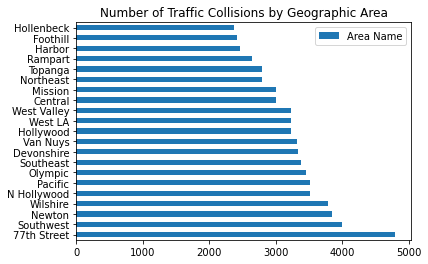

In [17]:
##this chart demonstrates the amount of traffic collisions per Area ID in Los Angeles. 
##The City of Los Angeles has 21 geographic areas or patrol divisions.
df1['Area Name'].value_counts().plot.barh(
    legend = True,
    title = 'Number of Traffic Collisions by Geographic Area')

In [18]:
##i want to clean up data a bit more.
df1['Month'] = pd.DatetimeIndex(df1['Date Occurred']).month
df1['Year'] = pd.DatetimeIndex(df1['Date Occurred']).year
df1_grouped = (df1.groupby(['Year', 'Month'])
                .size()
                .reset_index(name="n_traffic_accidents"))
df1_grouped

<ipython-input-18-318015a611d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.DatetimeIndex(df1['Date Occurred']).month
<ipython-input-18-318015a611d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = pd.DatetimeIndex(df1['Date Occurred']).year


,Year,Month,n_traffic_accidents
0,2019,1,4548
1,2019,2,4420
2,2019,3,4929
3,2019,4,4527
4,2019,5,4667
5,2019,6,4491
6,2019,7,4864
7,2019,8,4950
8,2019,9,4911
9,2019,10,5063


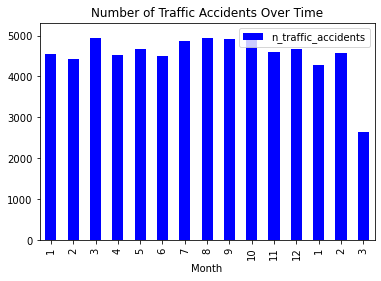

In [19]:
##i'm not sure how to edit the x-axis so that it is clear that the first 1-12 is Jan-Dec 2019 and
##the remaining 1-3 is Jan-Mar 2020
##getting to this step took a lot of time and going on stack overflow. i'm way above the memory right now for my notebook

df1_grouped.plot.bar(x="Month", y="n_traffic_accidents", color='blue', title = 'Number of Traffic Accidents Over Time');

In [20]:
##import geopandas
import geopandas as gpd

In [21]:
##read select file - this is census tract data
ctract = gpd.read_file('Data/2019 Census Tracts/tl_2019_06_tract.shp')

In [22]:
##see what type of data ctract is
type(ctract)

geopandas.geodataframe.GeoDataFrame

In [23]:
##conduct some data exploration
ctract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,139301,06037139301,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,"POLYGON ((-118.57150 34.17758, -118.57148 34.1..."
1,06,037,139302,06037139302,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.18019, -118.54070 34.1..."
2,06,037,139502,06037139502,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,"POLYGON ((-118.53225 34.16201, -118.53177 34.1..."
3,06,037,139600,06037139600,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,06037139701,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,"POLYGON ((-118.50980 34.15691, -118.50848 34.1..."


In [24]:
ctract.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [25]:
ctract.shape

(8057, 13)

In [26]:
##keep only certain columns
ctract = ctract[['COUNTYFP', 'TRACTCE', 'GEOID', 'NAMELSAD','INTPTLAT', 'INTPTLON', 'geometry']]

In [27]:
##rename columns
ctract.columns = ['County', 'Tract', 'GEOID', 'Name', 'lat', 'long', 'geometry']

In [28]:
#check that the renaming of columns worked
ctract.head()

,County,Tract,GEOID,Name,lat,long,geometry
0,037,139301,06037139301,Census Tract 1393.01,+34.1781538,-118.5581265,"POLYGON ((-118.57150 34.17758, -118.57148 34.1..."
1,037,139302,06037139302,Census Tract 1393.02,+34.1767230,-118.5383655,"POLYGON ((-118.54073 34.18019, -118.54070 34.1..."
2,037,139502,06037139502,Census Tract 1395.02,+34.1628402,-118.5263110,"POLYGON ((-118.53225 34.16201, -118.53177 34.1..."
3,037,139600,06037139600,Census Tract 1396,+34.1640599,-118.5101001,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,037,139701,06037139701,Census Tract 1397.01,+34.1574290,-118.4954117,"POLYGON ((-118.50980 34.15691, -118.50848 34.1..."
